In [1]:
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import collections as c
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 2000)

In [2]:
model = pickle.load(open('linear_regression_score.p', 'rb')) # load the model

In [ ]:
# model = LinearRegression(n_jobs=-1)

In [3]:
def scale_subset(df, columns):
    '''
    Use sklearn StandardScalar to scale only numeric columns.

    Parameters:
    ----------
    input {dataframe, list}: dataframe containing mixed feature variable types, list of names of numeric feature columns
    output: {dataframe}: dataframe with numeric features scaled and categorical features unchanged

    '''
    scalar = StandardScaler()
    numeric = df[columns]
    categorical = df.drop(columns, axis = 1)
    scalar.fit(numeric)
    num_scaled = pd.DataFrame(scalar.transform(numeric))
    num_scaled.rename(columns = dict(zip(num_scaled.columns, numeric_cols)), inplace = True)
    return pd.concat([num_scaled, categorical], axis = 1)


In [4]:
def only_completed(X_train, y_train, X_test, y_test, y_train_not_comp, y_test_not_comp):
    '''
    Returns dataframes with only those students who completed the course for the purpose of regressing the final score.
    '''
    test_indices = []
    train_indices = []

    y_test_not_comp = y_test_not_comp[y_test_not_comp['module_not_completed'] == 1]
    for index, row in y_test_not_comp.iterrows():
        test_indices.append(index)

    y_train_not_comp = y_train_not_comp[y_train_not_comp['module_not_completed'] == 1]
    for index, row in y_train_not_comp.iterrows():
        train_indices.append(index)

    return X_train.drop(train_indices), y_train.drop(train_indices), X_test.drop(test_indices), y_test.drop(test_indices)


In [13]:
    X_train = pd.read_csv('../data/processed/X_train.csv')
    y_train = pd.read_csv('../data/processed/y_train.csv')
    y_train_not_comp = y_train[['module_not_completed']]
    y_train = y_train['estimated_final_score']
    X_test = pd.read_csv('../data/processed/X_test.csv')
    y_test = pd.read_csv('../data/processed/y_test.csv')
    y_test_not_comp = y_test[['module_not_completed']]
    y_test = y_test['estimated_final_score']
    
numeric_cols = ['num_of_prev_attempts', 'studied_credits', 'clicks_per_day', 'pct_days_vle_accessed','max_clicks_one_day','first_date_vle_accessed', 'avg_score', 'avg_days_sub_early','days_early_first_assessment', 'score_first_assessment']


# fill and scale
    X_train.fillna(value = 0, inplace = True)
    y_train.fillna(value = 0, inplace = True)
    X_train = scale_subset(X_train, numeric_cols)
    X_test.fillna(value = 0, inplace = True)
    y_test.fillna(value = 0, inplace = True)
    X_test = scale_subset(X_test, numeric_cols)

/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [14]:
# only students who completed the course
X_train, y_train, X_test, y_test = only_completed(X_train, y_train, X_test, y_test, y_train_not_comp, y_test_not_comp)

In [15]:
# model.fit(X_train, y_train)

In [16]:
predictions = model.predict(X_test)

In [21]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
evs = explained_variance_score(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [22]:
print('RMSE: {}'.format(rmse))
print('R-squared: {}'.format(r2))

RMSE: 10.838831507545951
R-squared: 0.8307156824414912


In [23]:
    residuals = y_test - predictions

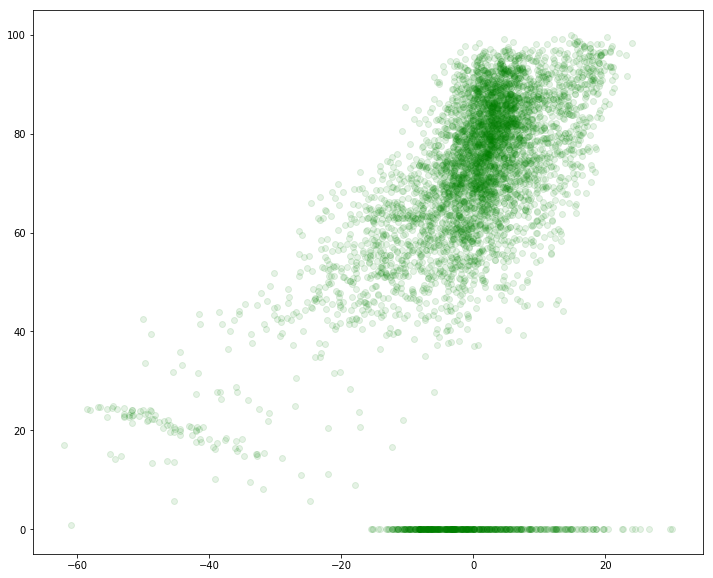

In [24]:
    plt.figure(figsize=(12,10))
    plt.scatter(x=residuals, y=y_test, alpha = 0.1, c='green')
    plt.show()

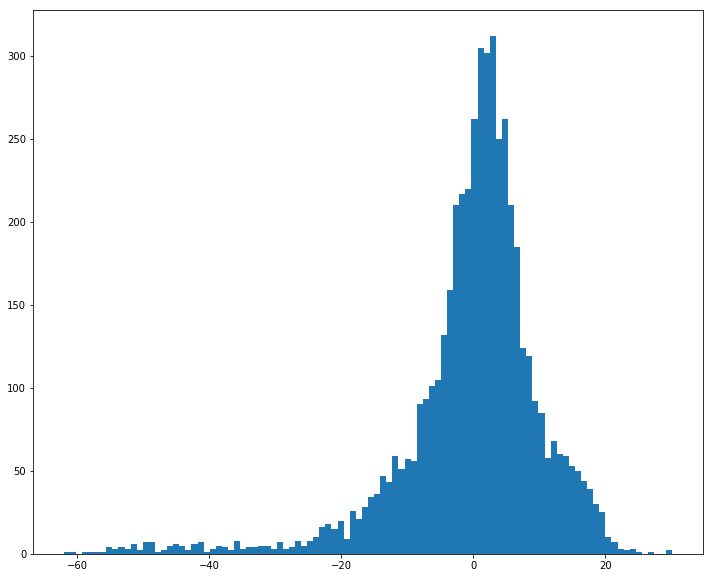

In [25]:
    plt.figure(figsize=(12,10))
    plt.hist(residuals, bins=100)
    plt.show()

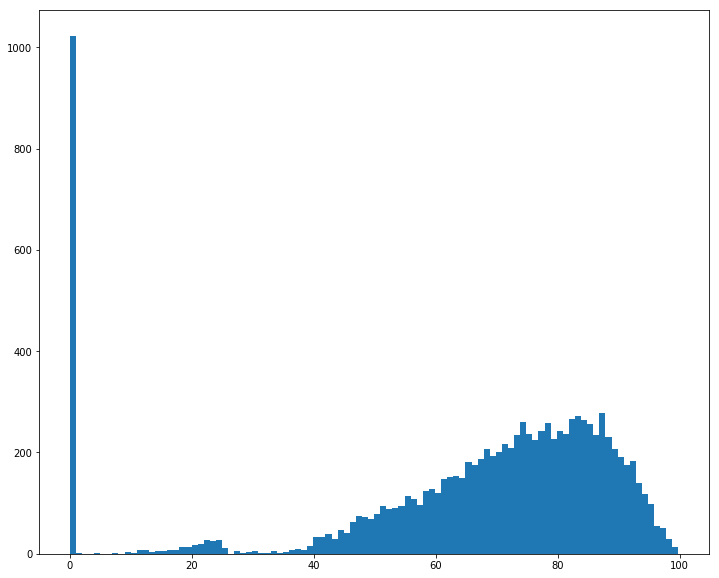

In [26]:
    plt.figure(figsize=(12,10))
    plt.hist(y_train, bins=100)
    plt.show()

# Which features are most important?

In [28]:
    abs_coef = list(np.abs(model.coef_.ravel()))
    features = list(X_test.columns)
    coef_dict = c.OrderedDict((zip(abs_coef, features)))
    sorted(coef_dict.items(), reverse=True)[:20]

[(78.13014573247125, 'code_module_GGG'),
 (30.52179750679699, 'avg_score'),
 (13.97885590370936, 'code_module_CCC'),
 (4.73918610917069, 'code_presentation_2014J'),
 (4.543111748595222, 'score_first_assessment'),
 (3.368794282246582, 'highest_education_Post Graduate Qualification'),
 (3.2709583964206206, 'highest_education_No Formal quals'),
 (3.130598324451424, 'code_module_DDD'),
 (3.086841934088853, 'code_module_BBB'),
 (2.3127134368816478, 'code_presentation_2014B'),
 (2.2024116507674956, 'pct_days_vle_accessed'),
 (2.1448130326105685, 'code_module_FFF'),
 (2.0958023711297247, 'code_presentation_2013J'),
 (1.6857362226392087, 'code_module_EEE'),
 (1.570357302569254, 'region_Yorkshire Region'),
 (1.559188615496089, 'age_band_55<='),
 (1.2757441621030314, 'imd_band_nan'),
 (1.2169831922951904, 'region_North Region'),
 (1.0419083967762501, 'age_band_35-55'),
 (1.0373420902506352, 'gender_M')]

In [ ]:
# pickle.dump(model, open('logistic_regression_completion.p', 'wb')) # pickle the model

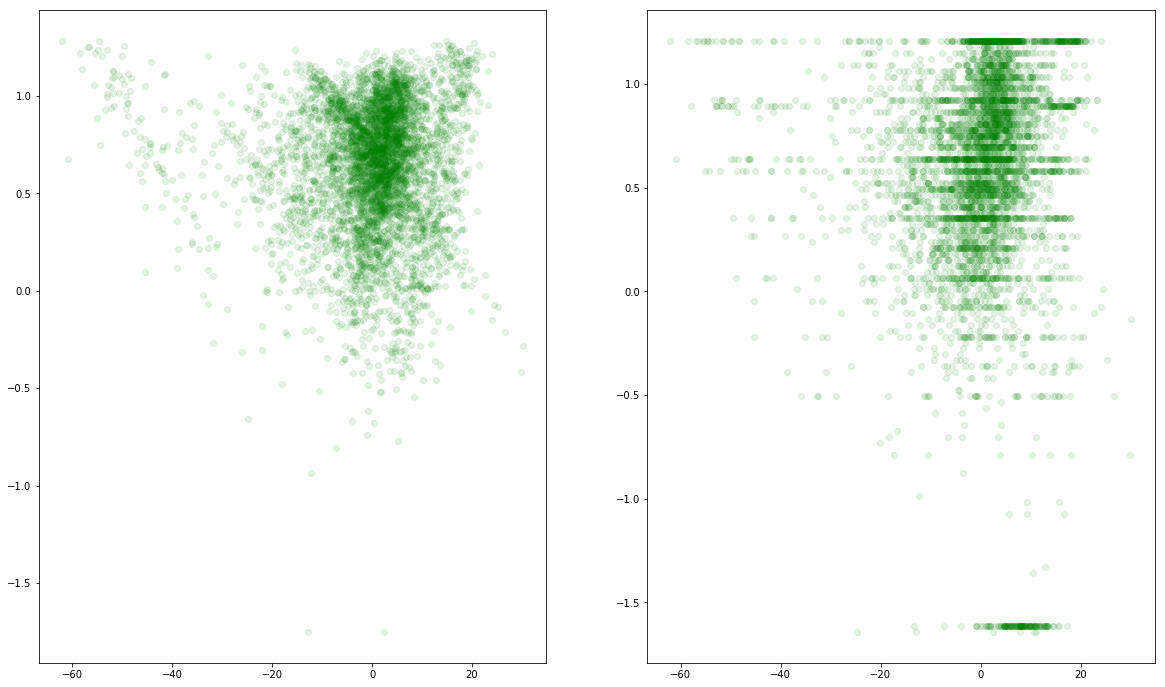

In [42]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,12))
ax[0].scatter(x=residuals, y=X_test['avg_score'], alpha = 0.1, c='green')
ax[1].scatter(x=residuals, y=X_test['score_first_assessment'], alpha = 0.1, c='green')
plt.show()